<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/time_series_analysis/keras_and_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [4]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [5]:
df.columns = ['sales']

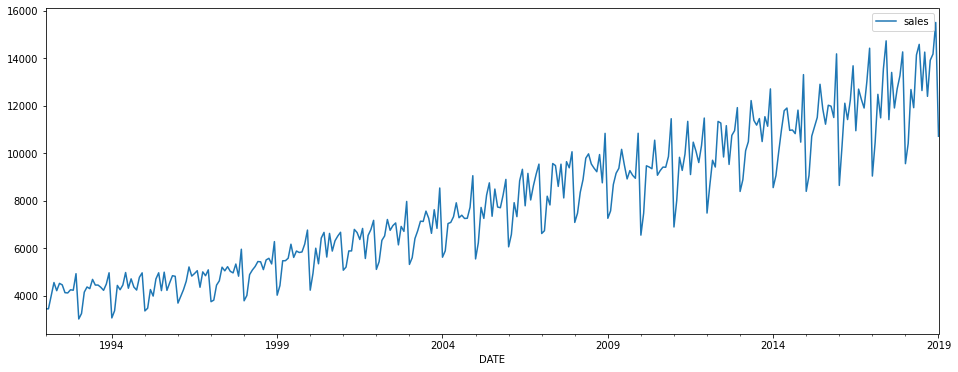

In [7]:
df.plot(figsize=(16,6))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
results = seasonal_decompose(df['sales'])

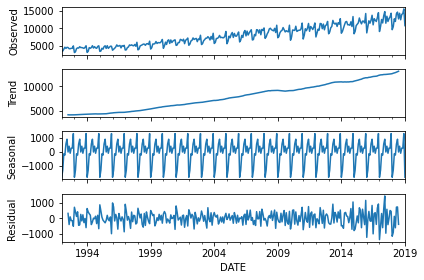

In [11]:
results.plot();

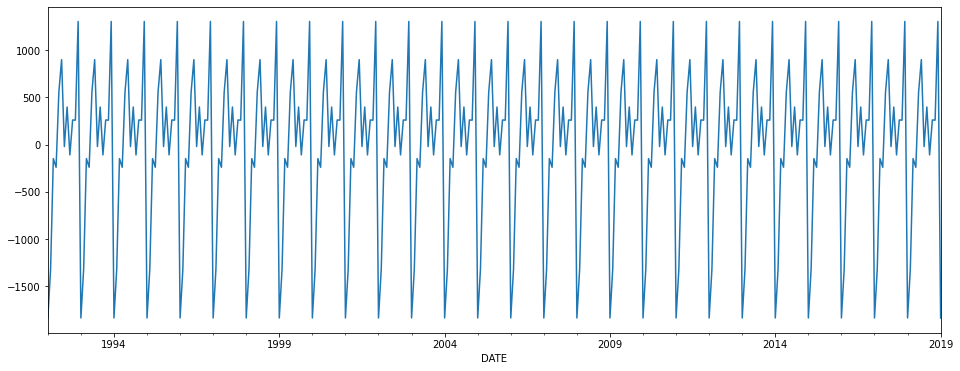

In [13]:
results.seasonal.plot(figsize=(16,6))

In [14]:
len(df)

325

In [15]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
n_input = 2
n_features = 1

geneartor = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [24]:
len(train)

313

In [25]:
len(geneartor)

311

In [26]:
x,y = geneartor[0]

In [27]:
x

array([[[0.03658432],
        [0.03649885]]])

In [28]:
y

array([[0.08299855]])

In [30]:
scaled_train[:3]

array([[0.03658432],
       [0.03649885],
       [0.08299855]])

In [32]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [33]:
n_input = 12
n_features = 1

tarin_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [36]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit_generator(tarin_generator,epochs=25)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
301/301 [==============================] - 23s 7ms/step - loss: 0.0226
Epoch 2/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0101
Epoch 3/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0071
Epoch 4/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0070
Epoch 5/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0088
Epoch 6/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0046
Epoch 7/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0034
Epoch 8/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0030
Epoch 9/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0022
Epoch 10/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0023
Epoch 11/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0023
Epoch 12/25
301/301 [==============================] - 2s 7ms/step - loss: 0.0023
Epoch 13/25
301/301 [===

In [39]:
model.history.history.keys()

dict_keys(['loss'])

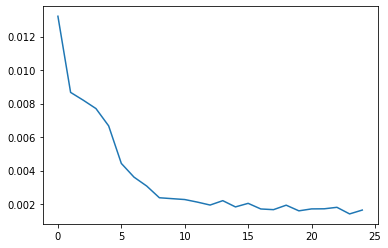

In [40]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [41]:
#12 history steps --> step 13
# last 12 points of train --> 1 test poiny

In [42]:
first_eval_batch = scaled_train[-12:]

In [43]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [46]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [47]:
model.predict(first_eval_batch)

array([[0.7146774]], dtype=float32)

#forecast using rnn model


In [48]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):

  current_prediction = model.predict(current_batch)[0]

  test_predictions.append(current_prediction)

  current_batch = np.append(current_batch[:,1:,:],[[current_prediction]],axis=1)

In [49]:
test_predictions

[array([0.7146774], dtype=float32),
 array([0.8345645], dtype=float32),
 array([0.7943619], dtype=float32),
 array([0.9601433], dtype=float32),
 array([1.0268179], dtype=float32),
 array([0.78719246], dtype=float32),
 array([0.9337907], dtype=float32),
 array([0.8097054], dtype=float32),
 array([0.88829833], dtype=float32),
 array([0.9288091], dtype=float32),
 array([0.9954681], dtype=float32),
 array([0.61988515], dtype=float32)]

In [50]:
true_predictions = scaler.inverse_transform(test_predictions)

In [51]:
true_predictions

array([[11392.01082581],
       [12794.57016748],
       [12324.23974365],
       [14263.71679091],
       [15043.74282062],
       [12240.36463487],
       [13955.41720915],
       [12503.74320114],
       [13423.20219415],
       [13897.13773519],
       [14676.98106843],
       [10283.03633028]])

In [53]:
test['predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


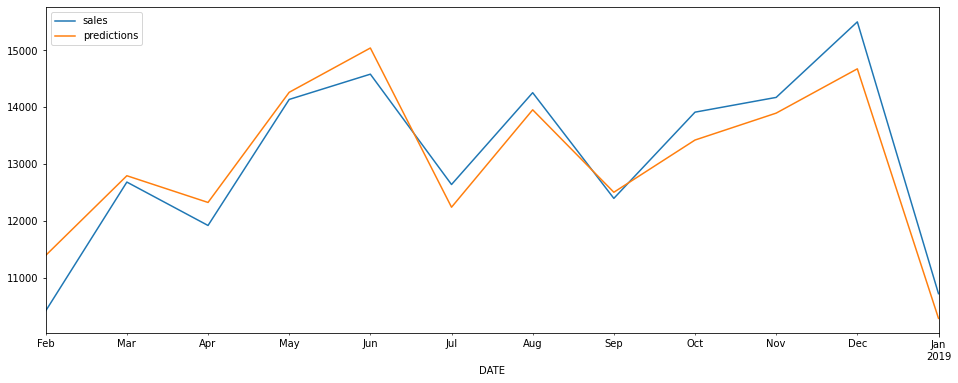

In [54]:
test.plot(figsize=(16,6))